# Apresentação:

# Importações:

In [ ]:
# Bibliotecas de Manipulação e Visualização:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Bibliotecas de ML
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Importação dos Dados:
df = pd.read_csv('dataset_petr3.csv', sep=';')
df

,DATA,IbovFut_Abertura-1,IbovFut_Fecha-1,IbovFut_Abertura,Oil_Abertura-1,Oil_Fechamento-1,Oil_Abertura,Petr3_Abertura-1,Petr3_Fecha-1,PETR3_Abertura,Nasdaq_Fecha-1,DolarFut_Fecha-1,PETR3_Fechamento
0,4012022,106.355,104.889,105.265,78.11,78.98,78.91,30.84,31.52,31.57,165.0177,96.211,31.92
1,5012022,105.265,104.400,104.605,78.91,80.00,80.07,31.57,31.92,32.00,162.7973,96.274,30.61
2,6012022,104.605,101.839,102.000,80.07,80.80,80.22,32.00,30.61,30.74,157.7177,96.182,30.58
3,7012022,102.000,102.349,102.480,80.22,81.99,82.00,30.74,30.58,30.76,157.6536,96.326,30.83
4,10012022,102.480,103.333,102.995,82.00,81.75,81.76,30.76,30.83,30.70,155.9219,95.722,30.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,26092022,113.158,112.444,111.030,90.44,86.15,85.03,34.71,32.90,32.80,113.1120,112.962,32.64
184,27092022,111.030,109.130,110.350,85.03,82.75,84.05,32.80,32.64,33.29,112.5410,114.085,32.87
185,28092022,110.350,109.135,108.135,84.05,86.27,84.84,33.29,32.87,32.87,112.7180,114.047,32.64
186,29092022,108.135,108.775,108.320,84.84,88.05,87.62,32.87,32.64,32.31,114.9380,112.508,32.67


# Análise Exploratória:

In [ ]:
# Informações:
display(df.info())
display(df.describe().drop('DATA',axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATA                188 non-null    int64  
 1   IbovFut_Abertura-1  188 non-null    float64
 2   IbovFut_Fecha-1     188 non-null    float64
 3   IbovFut_Abertura    188 non-null    float64
 4   Oil_Abertura-1      188 non-null    float64
 5   Oil_Fechamento-1    188 non-null    float64
 6   Oil_Abertura        188 non-null    float64
 7   Petr3_Abertura-1    188 non-null    float64
 8   Petr3_Fecha-1       188 non-null    float64
 9   PETR3_Abertura      188 non-null    float64
 10  Nasdaq_Fecha-1      188 non-null    float64
 11  DolarFut_Fecha-1    188 non-null    float64
 12  PETR3_Fechamento    188 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 19.2 KB


None

,IbovFut_Abertura-1,IbovFut_Fecha-1,IbovFut_Abertura,Oil_Abertura-1,Oil_Fechamento-1,Oil_Abertura,Petr3_Abertura-1,Petr3_Fecha-1,PETR3_Abertura,Nasdaq_Fecha-1,DolarFut_Fecha-1,PETR3_Fechamento
count,188.000000,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,109.842973,109.830362,109.852755,102.035053,102.06883,102.084149,34.443245,34.473457,34.452128,132.343554,102.559309,34.481862
std,5.878257,5.845442,5.873908,11.223005,11.00390,11.136252,2.297261,2.277944,2.286457,12.805674,4.924519,2.268511
min,97.230000,97.030000,97.230000,78.110000,78.98000,78.910000,28.790000,28.910000,28.790000,111.275700,94.775000,28.910000
25%,105.173750,105.574500,105.173750,93.082500,93.23750,93.082500,33.095000,33.057500,33.095000,121.082500,98.420750,33.082500
50%,111.225000,111.173000,111.225000,101.810000,101.71000,101.810000,34.565000,34.690000,34.565000,130.612450,103.071500,34.685000
75%,113.646250,113.603750,113.646250,111.290000,110.95500,111.290000,36.067500,36.210000,36.067500,142.392800,106.397500,36.210000
max,122.085000,121.946000,122.085000,130.280000,127.98000,130.280000,40.250000,39.850000,40.250000,165.017700,114.085000,39.850000


In [ ]:
# Separando Abertura de Fechamento:
abertura = ['IbovFut_Abertura-1','IbovFut_Abertura','Oil_Abertura-1','Oil_Abertura','Petr3_Abertura-1','PETR3_Abertura']
fechamento = ['IbovFut_Fecha-1','Oil_Fechamento-1','Petr3_Fecha-1','Nasdaq_Fecha-1','DolarFut_Fecha-1','PETR3_Fechamento']

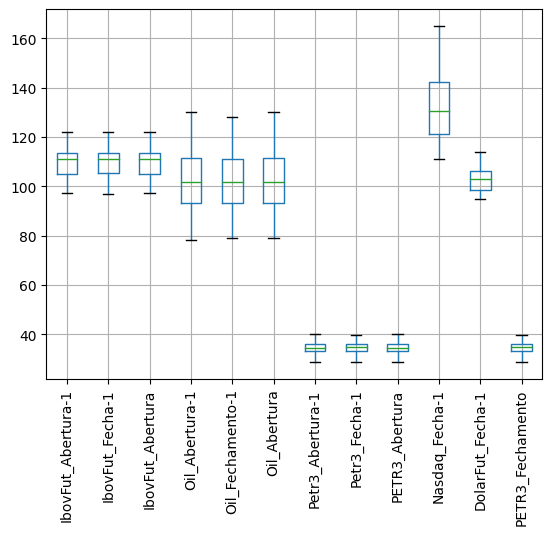

In [ ]:
df.drop('DATA',axis=1).boxplot()
#plt.legend(df.drop('DATA', axis=1).columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()


Análise do Boxplot
```
  Analisando o boxplot, está dificil de enxergar
a diferença entre a distribuição dos diferentes dados
de abertura do mesmo papel. Deste modo, considero
relevante olhar a distribuição mais de perto.
```



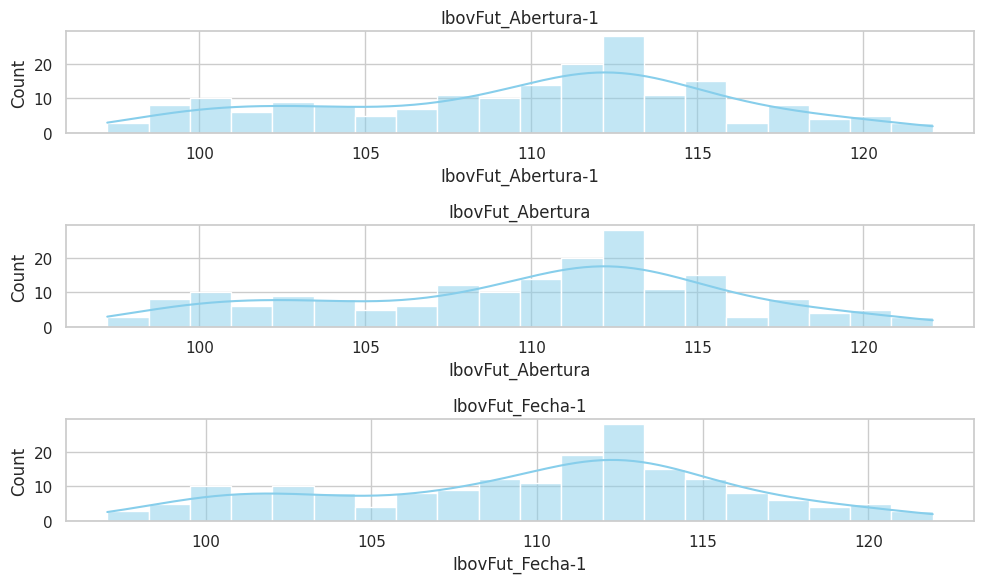

In [ ]:
# Ibovespa:
ibov = ['IbovFut_Abertura-1','IbovFut_Abertura','IbovFut_Fecha-1']
# Configurando o estilo seaborn
sns.set(style="whitegrid")

# Criando subplots para cada variável
fig, axes = plt.subplots(nrows=len(ibov), ncols=1, figsize=(10, 2 * len(ibov)))

# Iterando sobre as colunas e criando os histogramas usando seaborn
for i, var in enumerate(ibov):
    sns.histplot(df[var], ax=axes[i], kde=True, bins=20, color='skyblue')
    axes[i].set_title(var)

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas
plt.show()

<Axes: >

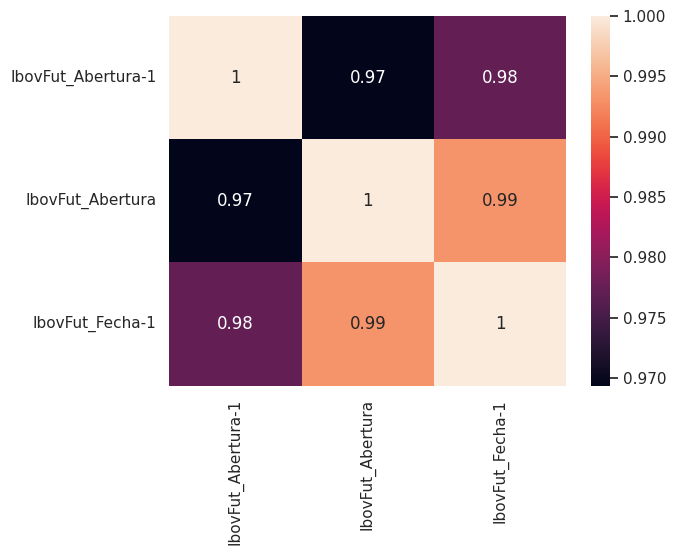

In [ ]:
# Checando Correlação
sns.heatmap(df[ibov].corr(), annot = True)

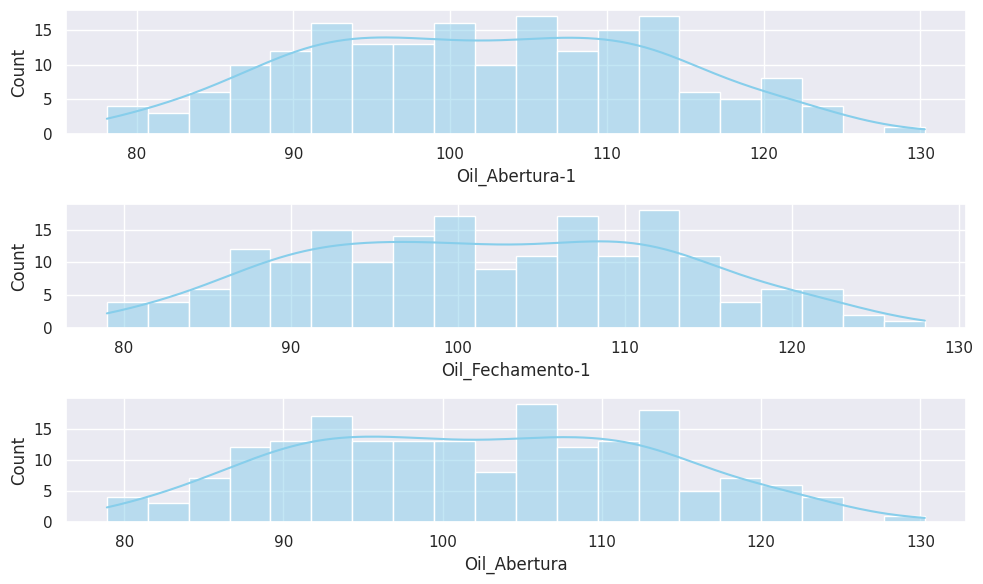

In [ ]:
# Oil:
oil = ['Oil_Abertura-1','Oil_Fechamento-1','Oil_Abertura']
# Configurando o estilo seaborn
sns.set(style="darkgrid")

# Criando subplots para cada variável
fig, axes = plt.subplots(nrows=len(oil), ncols=1, figsize=(10, 2 * len(oil)))

# Iterando sobre as colunas e criando os histogramas usando seaborn
for i, var in enumerate(oil):
    sns.histplot(df[var], ax=axes[i], kde=True, bins=20, color='skyblue')
    #axes[i].set_title(var)

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas
plt.show()

<Axes: >

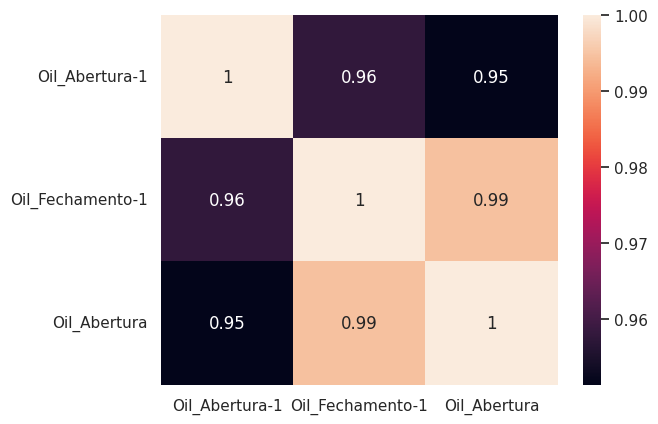

In [ ]:
# Checando Correlação
sns.heatmap(df[oil].corr(), annot = True)

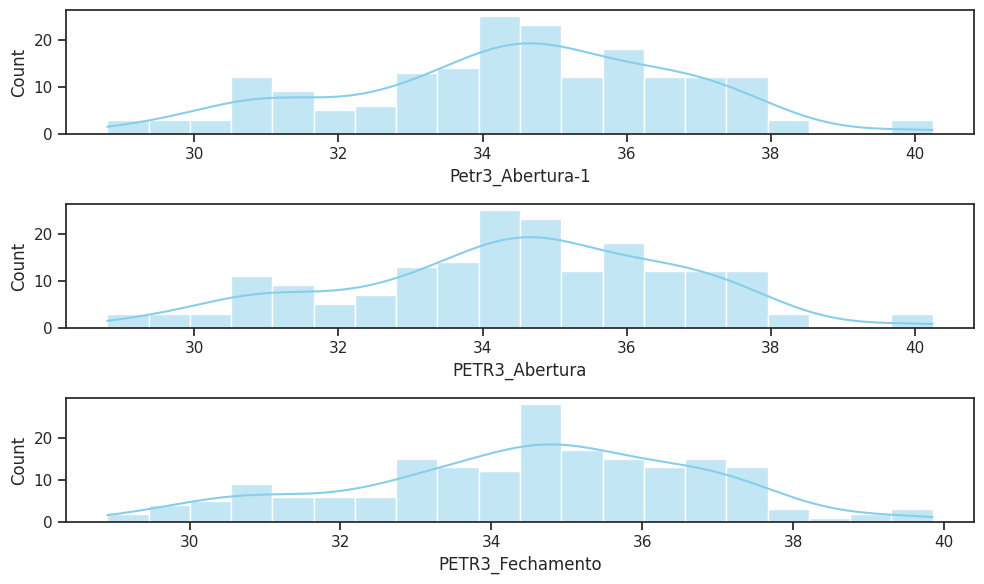

In [ ]:
# Petr3:
petr3 = ['Petr3_Abertura-1','PETR3_Abertura','PETR3_Fechamento']

# Configurando o estilo seaborn
sns.set(style="ticks")

# Criando subplots para cada variável
fig, axes = plt.subplots(nrows=len(petr3), ncols=1, figsize=(10, 2 * len(petr3)))

# Iterando sobre as colunas e criando os histogramas usando seaborn
for i, var in enumerate(petr3):
    sns.histplot(df[var], ax=axes[i], kde=True, bins=20, color='skyblue')
    #axes[i].set_title(var)

# Ajustando o layout
plt.tight_layout()

# Exibindo os histogramas
plt.show()

<Axes: >

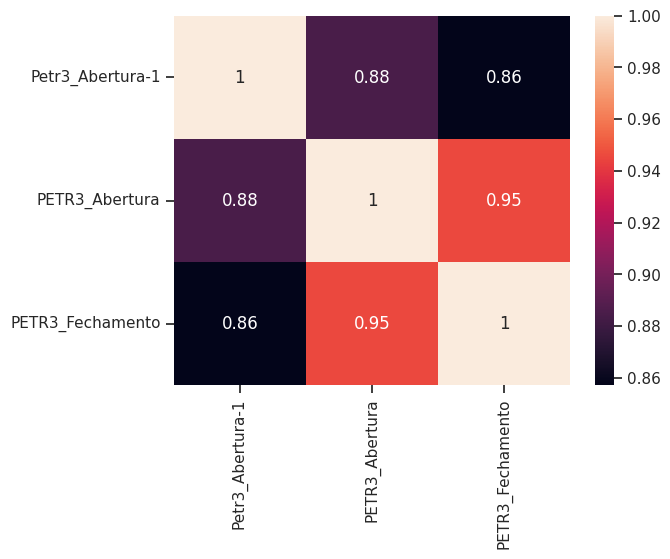

In [ ]:
# Checando Correlação
sns.heatmap(df[petr3].corr(), annot = True)


Conclusão:
```
Ainda que pareça que a distribuição dos dados de abertura, como
IbovFut_Abertura-1 e IbovFut_Abertura, por exemplo, sejam idênticas,
a correlação indica que não são os mesmo valores.
```



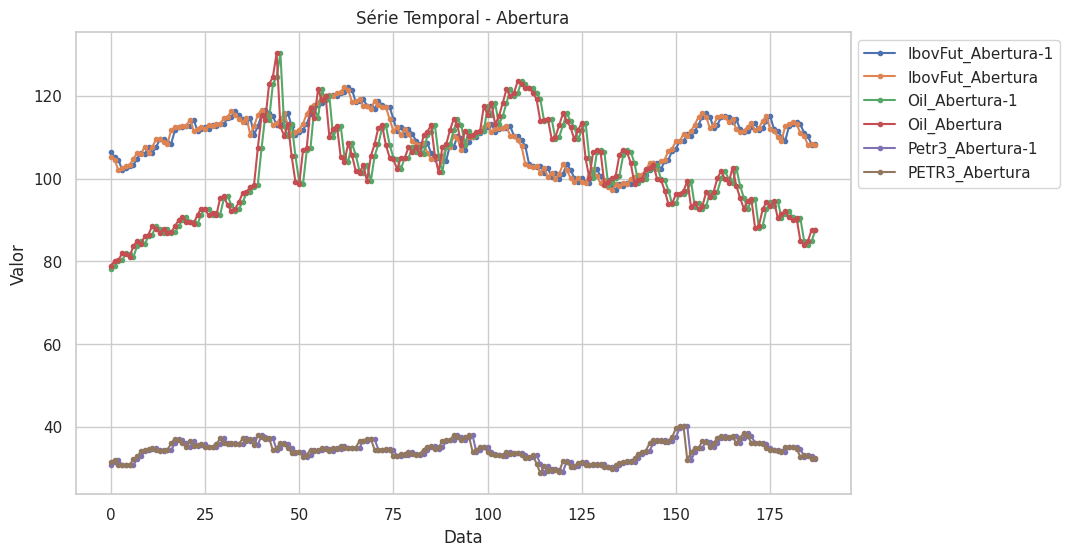

In [ ]:
# Definir a coluna 'DATA' como índice
sns.set(style="whitegrid")

# Plotar a série temporal
plt.figure(figsize=(10, 6))  # Ajustar o tamanho do gráfico conforme necessário
plt.plot(df[abertura].index, df[abertura], marker='.', linestyle='-')
plt.legend(df[abertura].columns, loc='upper left', bbox_to_anchor=(1, 1))
# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal - Abertura')

# Exibir o gráfico
plt.show()

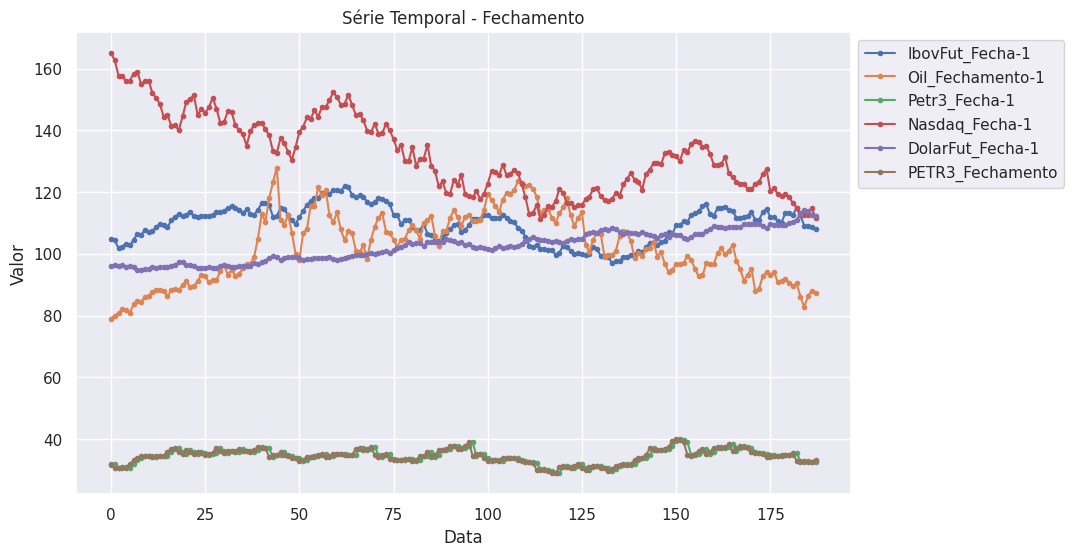

In [ ]:
# Definir a coluna 'DATA' como índice
sns.set(style="darkgrid")

# Plotar a série temporal
plt.figure(figsize=(10, 6))  # Ajustar o tamanho do gráfico conforme necessário
plt.plot(df[fechamento].index, df[fechamento], marker='.', linestyle='-')
plt.legend(df[fechamento].columns, loc='upper left', bbox_to_anchor=(1, 1))
# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal - Fechamento')

# Exibir o gráfico
plt.show()

# Feature Importance:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATA                188 non-null    int64  
 1   IbovFut_Abertura-1  188 non-null    float64
 2   IbovFut_Fecha-1     188 non-null    float64
 3   IbovFut_Abertura    188 non-null    float64
 4   Oil_Abertura-1      188 non-null    float64
 5   Oil_Fechamento-1    188 non-null    float64
 6   Oil_Abertura        188 non-null    float64
 7   Petr3_Abertura-1    188 non-null    float64
 8   Petr3_Fecha-1       188 non-null    float64
 9   PETR3_Abertura      188 non-null    float64
 10  Nasdaq_Fecha-1      188 non-null    float64
 11  DolarFut_Fecha-1    188 non-null    float64
 12  PETR3_Fechamento    188 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 19.2 KB


<Axes: >

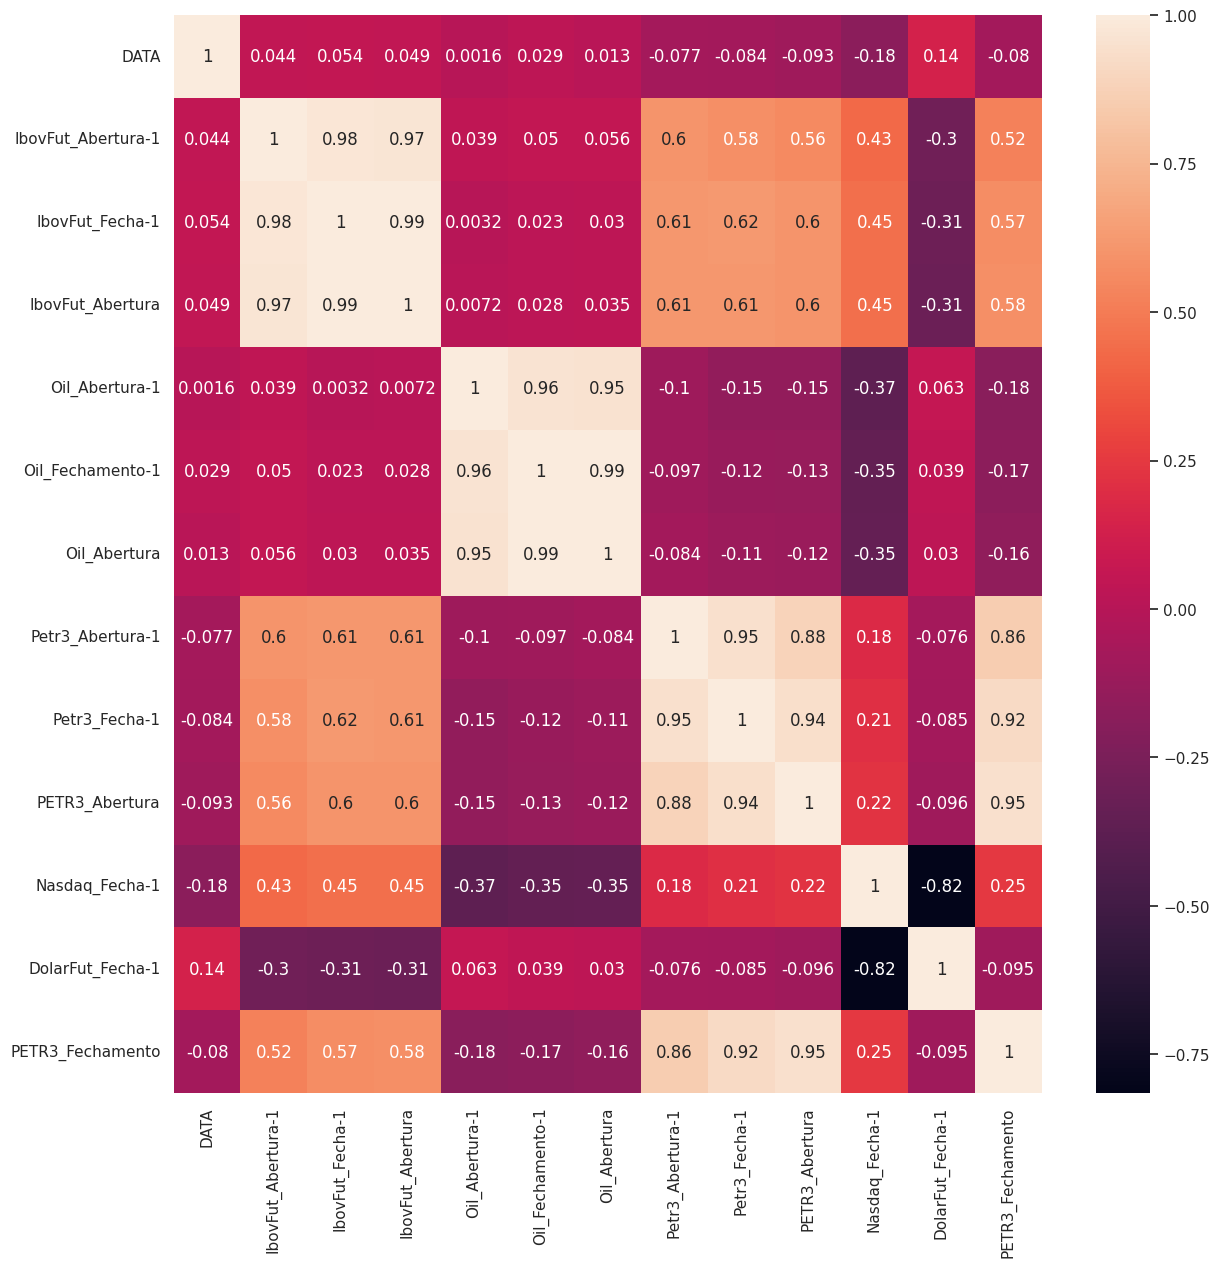

In [ ]:
# Correlação:
plt.figure(figsize = (14,14))
sns.heatmap(df.corr(), annot = True) # Plota Matriz de Correlação liner do dataset

In [ ]:
# Calcular as correlações
correlations = df.corr()

# Obter as 10 variáveis com maior correlação com 'Alvo'
target_correlations = correlations['PETR3_Fechamento'].sort_values(ascending=False)[1:11]

# Exibir as 10 variáveis com maior correlação
print(target_correlations)

PETR3_Abertura        0.945490
Petr3_Fecha-1         0.915355
Petr3_Abertura-1      0.857106
IbovFut_Abertura      0.577007
IbovFut_Fecha-1       0.567984
IbovFut_Abertura-1    0.524208
Nasdaq_Fecha-1        0.246280
DATA                 -0.079875
DolarFut_Fecha-1     -0.095418
Oil_Abertura         -0.161967
Name: PETR3_Fechamento, dtype: float64


In [ ]:
coor_features = ['PETR3_Abertura','Petr3_Fecha-1','Petr3_Abertura-1',
                 'IbovFut_Abertura','IbovFut_Fecha-1','IbovFut_Abertura-1',
                 'Nasdaq_Fecha-1','DATA','DolarFut_Fecha-1','Oil_Abertura']

Ponto de Variância Explicada: 0.8417407925655251
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MSE: 0.5984648611244485


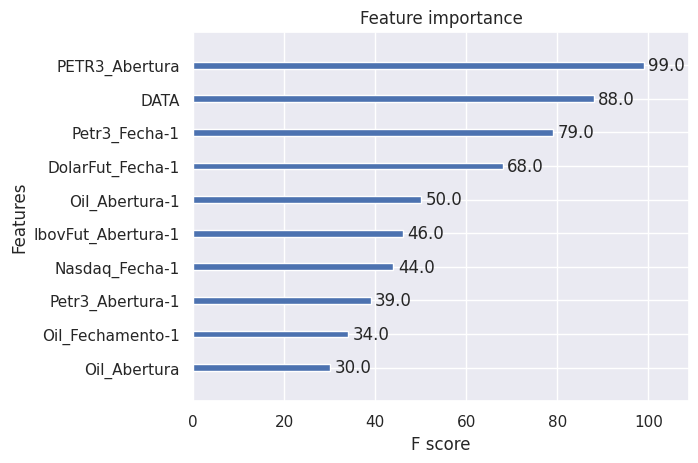

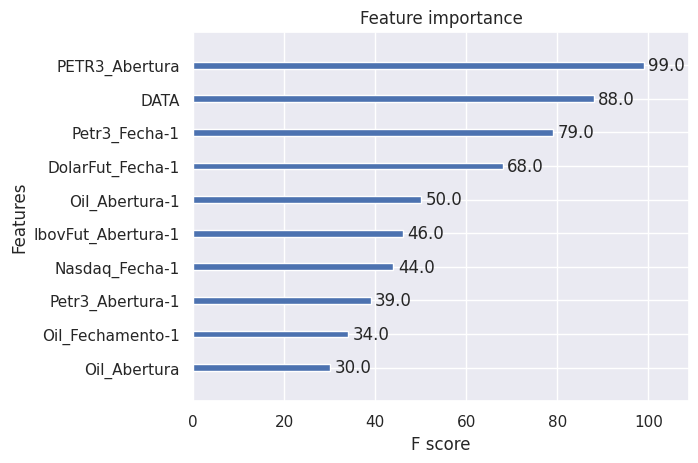

In [ ]:
# Separando o alvo:
y = df['PETR3_Fechamento']
X = df.drop(['PETR3_Fechamento'], axis=1)

# Treinando o modelo:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estimando:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

from sklearn.metrics import explained_variance_score

y_pred = xgb_model.predict(X_test)
evs = explained_variance_score(y_test, y_pred)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Plotando:
plot_importance(xgb_model, max_num_features=10)
print('Ponto de Variância Explicada:', evs)
print('Melhores parâmetros:', grid_search.best_params_)
print('MSE:', -grid_search.best_score_)

# Extraindo as informações como Lista:
feature_importance_dict = xgb_model.get_booster().get_score(importance_type='weight')
feature_importance_list = list(feature_importance_dict.items())

feature_importance = plot_importance(xgb_model, max_num_features=10)


**Métricas:**
```
1. Ponto de Variância Explicada:
  O "Ponto de Variância Explicada" ou "Explained Variance Score" (EVS) é
  uma métrica de avaliação de modelos de regressão que quantifica a
  proporção da variância total dos dados que é explicada pelo modelo.
  Em outras palavras, indica o quão bem o modelo consegue explicar a
  variação nos dados.

  O EVS varia de 0 a 1, onde 1 indica que o modelo explica perfeitamente a
  variância dos dados, e 0 indica que o modelo não consegue explicar nada
  da variância. Valores negativos são possíveis e indicam que o modelo é
  pior do que um modelo constante que sempre prevê a média dos rótulos de
  treinamento.

2. Melhores parâmetros:
  Se refere a melhor otimização dos hiperparâmetros, ou seja,
  nada mais é do que a melhor combinação de hiperparametros de
  modo a deixar o modelo mais bem otimizado.

3. Erro Quadratico Médio (MSE):
  O MSE é uma métrica de avaliação das mais comuns para problemas de
  regressão. Ele mede a média dos quadrados dos erros entre as previsões
  do modelo e os valores reais.
```



In [ ]:
xgboost_features = [feature_importance_list[i][0] for i,_ in enumerate(feature_importance_list)]
xgboost_features

['DATA',
 'IbovFut_Abertura-1',
 'IbovFut_Fecha-1',
 'IbovFut_Abertura',
 'Oil_Abertura-1',
 'Oil_Fechamento-1',
 'Oil_Abertura',
 'Petr3_Abertura-1',
 'Petr3_Fecha-1',
 'PETR3_Abertura',
 'Nasdaq_Fecha-1',
 'DolarFut_Fecha-1']

In [ ]:
# Comparando features:
correlacao = set(coor_features)
xgboost = set(xgboost_features)

print(len(correlacao.intersection(xgboost)))
display(correlacao.intersection(xgboost))

10


{'DATA',
 'DolarFut_Fecha-1',
 'IbovFut_Abertura',
 'IbovFut_Abertura-1',
 'IbovFut_Fecha-1',
 'Nasdaq_Fecha-1',
 'Oil_Abertura',
 'PETR3_Abertura',
 'Petr3_Abertura-1',
 'Petr3_Fecha-1'}

# Previsão:

In [ ]:
df_relevantes = pd.concat([df[xgboost_features].copy(), df['PETR3_Fechamento']],axis=1)
df_relevantes

,DATA,IbovFut_Abertura-1,IbovFut_Fecha-1,IbovFut_Abertura,Oil_Abertura-1,Oil_Fechamento-1,Oil_Abertura,Petr3_Abertura-1,Petr3_Fecha-1,PETR3_Abertura,Nasdaq_Fecha-1,DolarFut_Fecha-1,PETR3_Fechamento
0,4012022,106.355,104.889,105.265,78.11,78.98,78.91,30.84,31.52,31.57,165.0177,96.211,31.92
1,5012022,105.265,104.400,104.605,78.91,80.00,80.07,31.57,31.92,32.00,162.7973,96.274,30.61
2,6012022,104.605,101.839,102.000,80.07,80.80,80.22,32.00,30.61,30.74,157.7177,96.182,30.58
3,7012022,102.000,102.349,102.480,80.22,81.99,82.00,30.74,30.58,30.76,157.6536,96.326,30.83
4,10012022,102.480,103.333,102.995,82.00,81.75,81.76,30.76,30.83,30.70,155.9219,95.722,30.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,26092022,113.158,112.444,111.030,90.44,86.15,85.03,34.71,32.90,32.80,113.1120,112.962,32.64
184,27092022,111.030,109.130,110.350,85.03,82.75,84.05,32.80,32.64,33.29,112.5410,114.085,32.87
185,28092022,110.350,109.135,108.135,84.05,86.27,84.84,33.29,32.87,32.87,112.7180,114.047,32.64
186,29092022,108.135,108.775,108.320,84.84,88.05,87.62,32.87,32.64,32.31,114.9380,112.508,32.67


In [ ]:
df_relevantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATA                188 non-null    int64  
 1   IbovFut_Abertura-1  188 non-null    float64
 2   IbovFut_Fecha-1     188 non-null    float64
 3   IbovFut_Abertura    188 non-null    float64
 4   Oil_Abertura-1      188 non-null    float64
 5   Oil_Fechamento-1    188 non-null    float64
 6   Oil_Abertura        188 non-null    float64
 7   Petr3_Abertura-1    188 non-null    float64
 8   Petr3_Fecha-1       188 non-null    float64
 9   PETR3_Abertura      188 non-null    float64
 10  Nasdaq_Fecha-1      188 non-null    float64
 11  DolarFut_Fecha-1    188 non-null    float64
 12  PETR3_Fechamento    188 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 19.2 KB


In [ ]:
# Separando a variável Target:
X = df_relevantes
y = df_relevantes['PETR3_Fechamento']

# Separando os dados de traino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
# Criando o regressor pelo XGB:
regressor_xgb = xgb.XGBRegressor(eval_metric='mae')
regressor_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Métricas de Erro:
print(f"Raiz Quadradra do Erro Quadrático Médio: {cross_val_score(regressor_xgb,X,y,scoring='neg_root_mean_squared_error').mean()}")
print(f"Erro médio absoluto: {cross_val_score(regressor_xgb,X,y,scoring='neg_mean_absolute_error').mean()}")

# Métrica de Regressão:
print(f"R2 Score: {cross_val_score(regressor_xgb,X,y,scoring='r2').mean()}")

Raiz Quadradra do Erro Quadrático Médio: -0.20937901131159284
Erro médio absoluto: -0.1379455548173841
R2 Score: 0.9889694817556727



**Nota**
```
  O menos no resultado é só para indicar que
é um erro, algo "negativo".
```



In [ ]:
# Fit na base de treino:
regressor_xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predições:
predicoes_petr3 = regressor_xgb.predict(X_test)
print(predicoes_petr3[:10])

[32.64071  37.089474 35.88862  35.799953 36.60157  33.33038  35.650322
 33.089493 36.85006  36.31871 ]


In [ ]:
# Checando o y de teste para comparar como a previsão:
print(y_test[:10])

183    32.64
162    37.09
18     35.89
15     35.80
67     36.60
108    33.33
45     35.65
76     33.09
16     36.85
146    36.32
Name: PETR3_Fechamento, dtype: float64


In [ ]:
from math import sqrt

# Checando métrica de erro:
print(f"MSE: {mean_squared_error(y_test, predicoes_petr3)}")
print(f"RMSE: {sqrt(mean_squared_error(y_test, predicoes_petr3))}")
print(f"R2 Score: {r2_score(y_test, predicoes_petr3)}")

MSE: 6.916526906897129e-07
RMSE: 0.0008316565942080378
R2 Score: 0.999999848722628


# Visualização:

In [ ]:
y_test_ordenado = pd.Series(list(pd.Series(y_test)))

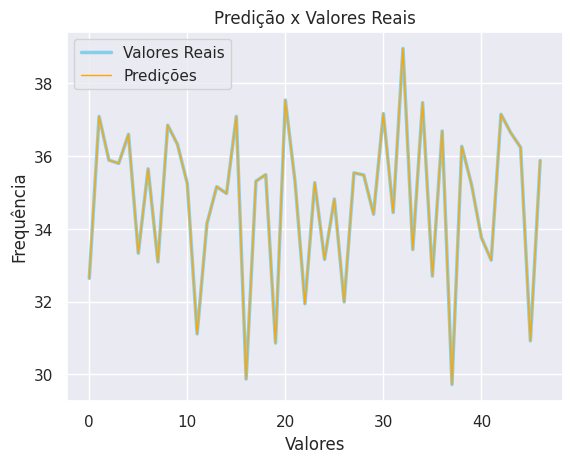

In [ ]:
sns.lineplot(data=y_test_ordenado, linewidth=2.5,color='skyblue', label='Valores Reais')
sns.lineplot(data=predicoes_petr3, linewidth=1, color='orange', label='Predições')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Predição x Valores Reais')

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
# Making predictions for the new data
future_prediction = regressor_xgb.predict(X_test)

print("Predicted Future Value:", future_prediction[0])

Predicted Future Value: 32.64071
